## Library yang di perlukan

    1. wfdb -> Membaca file sinyal
    2. glob -> membuat list semua letak data.
    3. pickle -> menyimpan file
    4. 

In [1]:
import wfdb
import glob
import numpy as np
from matplotlib import pyplot as plt
from wfdb import processing as prep
import pickle
import pandas
from wavelet import wavelet

## Sinyal ElektroKardiogram
       Sinyal EKG adalah rekaman aktivitas listrik dari sinyal jantung. Dari rekaman inilah, Informasi mengenai jantung dapat di analisis sehingga penyakit dapat didiagnosis dengan tepat. Ada dua cara untuk melakukan analisis terhadap sinyal EKG, yaitu :

### 1. Beat
    Beat/ detak jantung sinyal dalam EKG di representaikan dengan satu gelombang sinyal yang terdiri dari Gelombang P, QRS-kompleks, dan T.
<div>
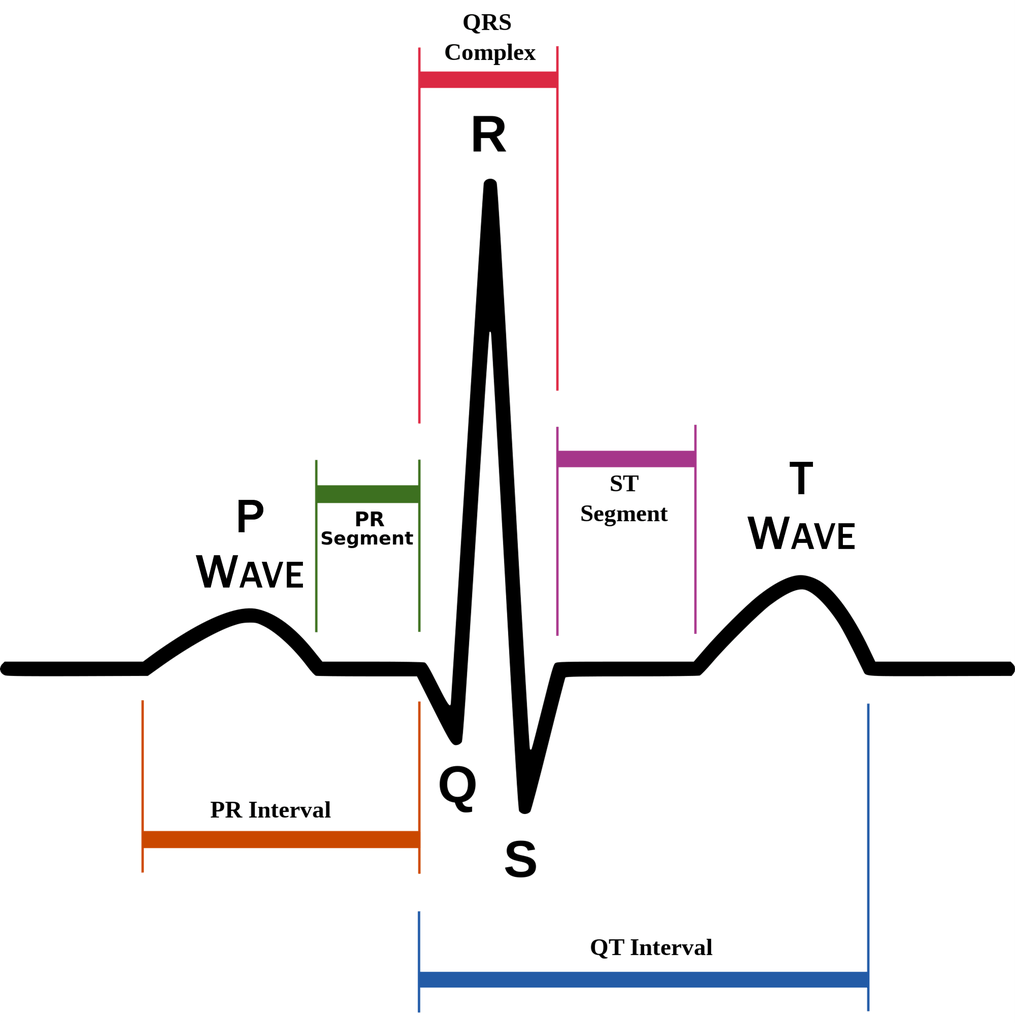
</div>

### 2. Ritme
    Ritme di gambarkan dengan jumlah beat sinyal yang lebih dari satu.
<div>
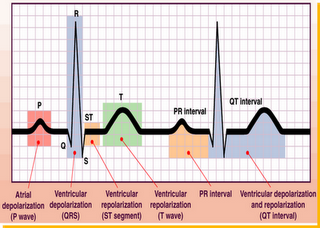
</div>

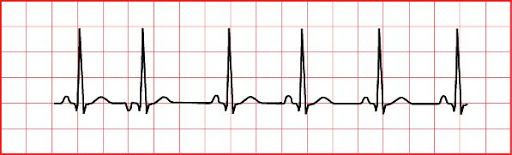


## Perlakuan Umum Sinyal EKG


### 1. Pengurangan Derau

    1. Derau Umum
        
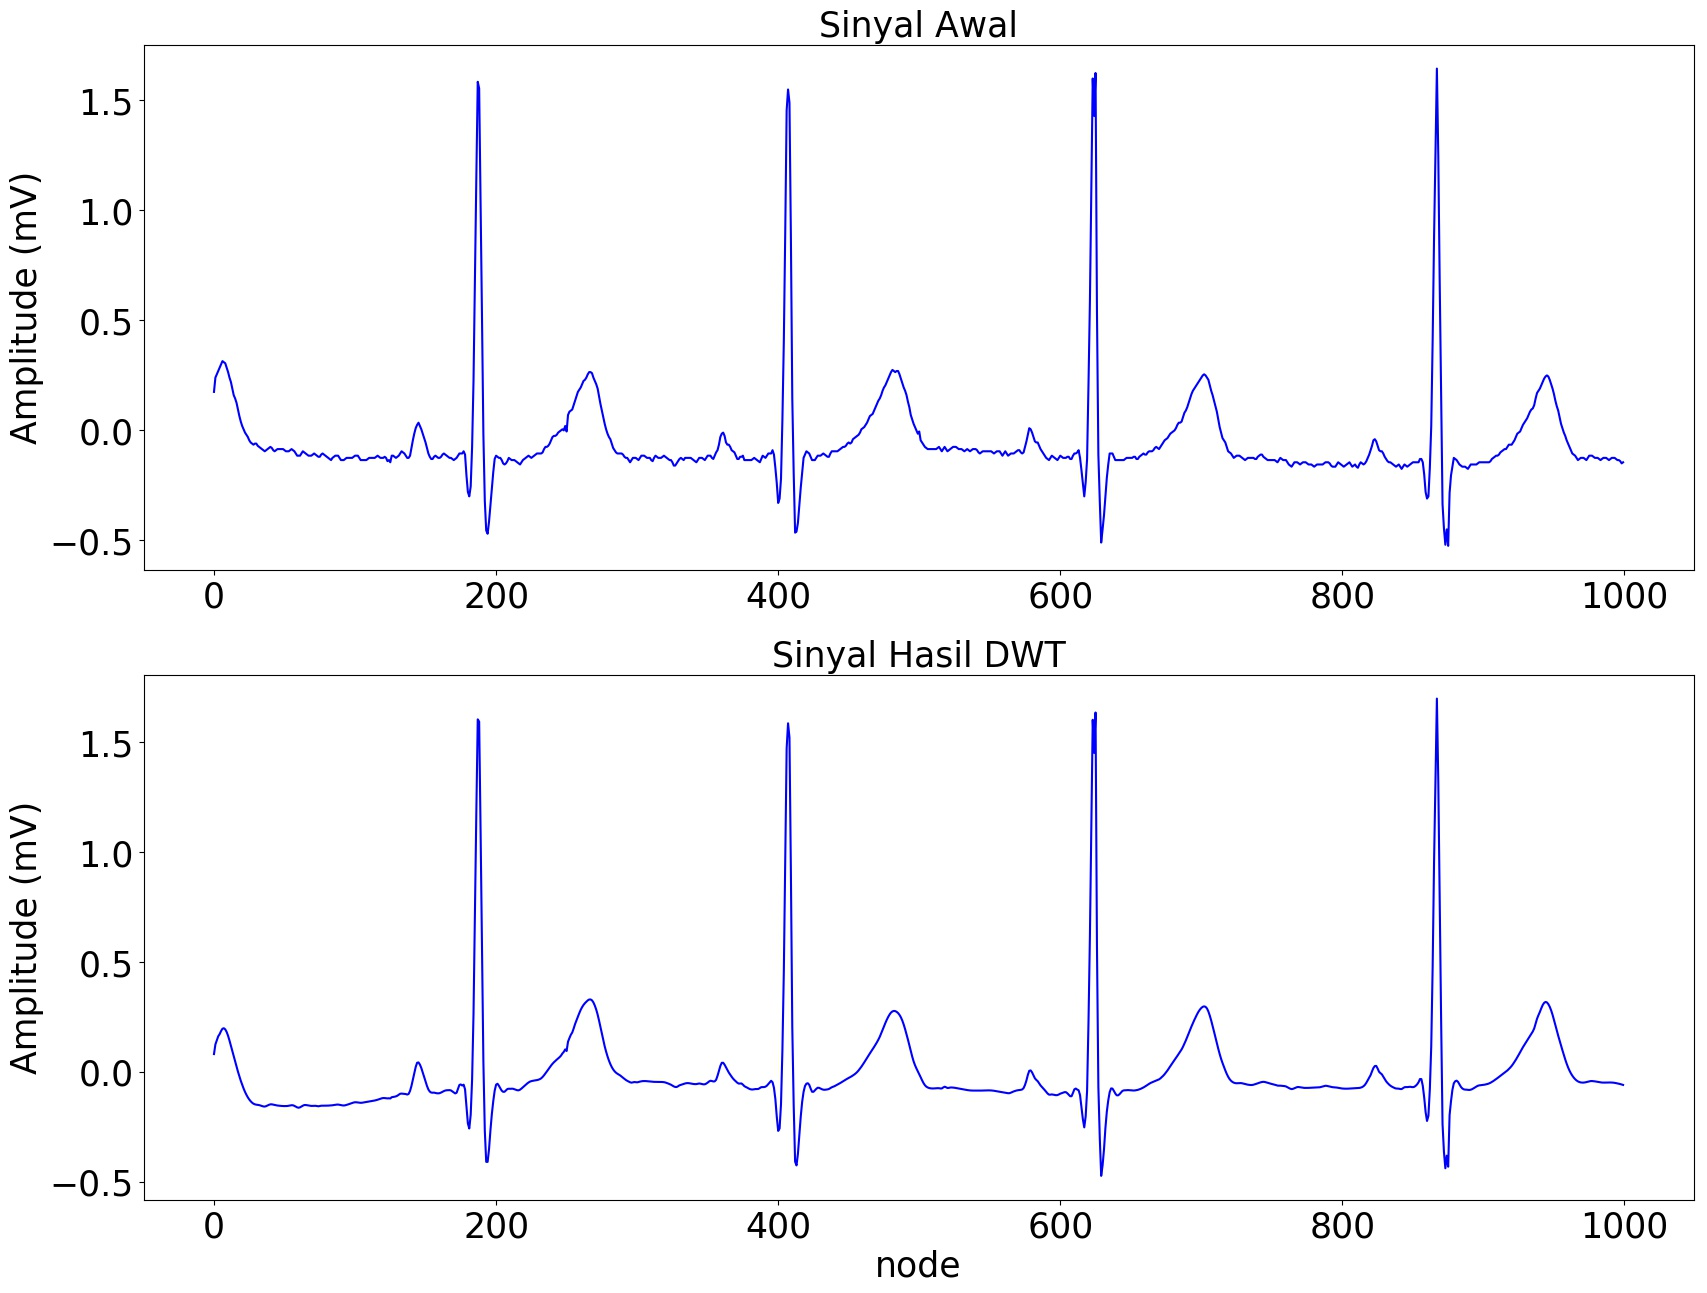
    
    2. Baseline wander
        Baseline wander adalah tipe noise dimana sinyal ekg berada pada titik garis yang berbeda ( pergeseran keatas dan kebawa ) dan biasanya terjadi di frekuensi rendah. Contohny saat bernafas, sinyal jantung tidak beraturan.

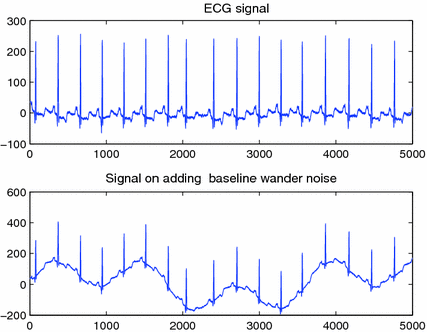


### 2. Normalisasi
<div>
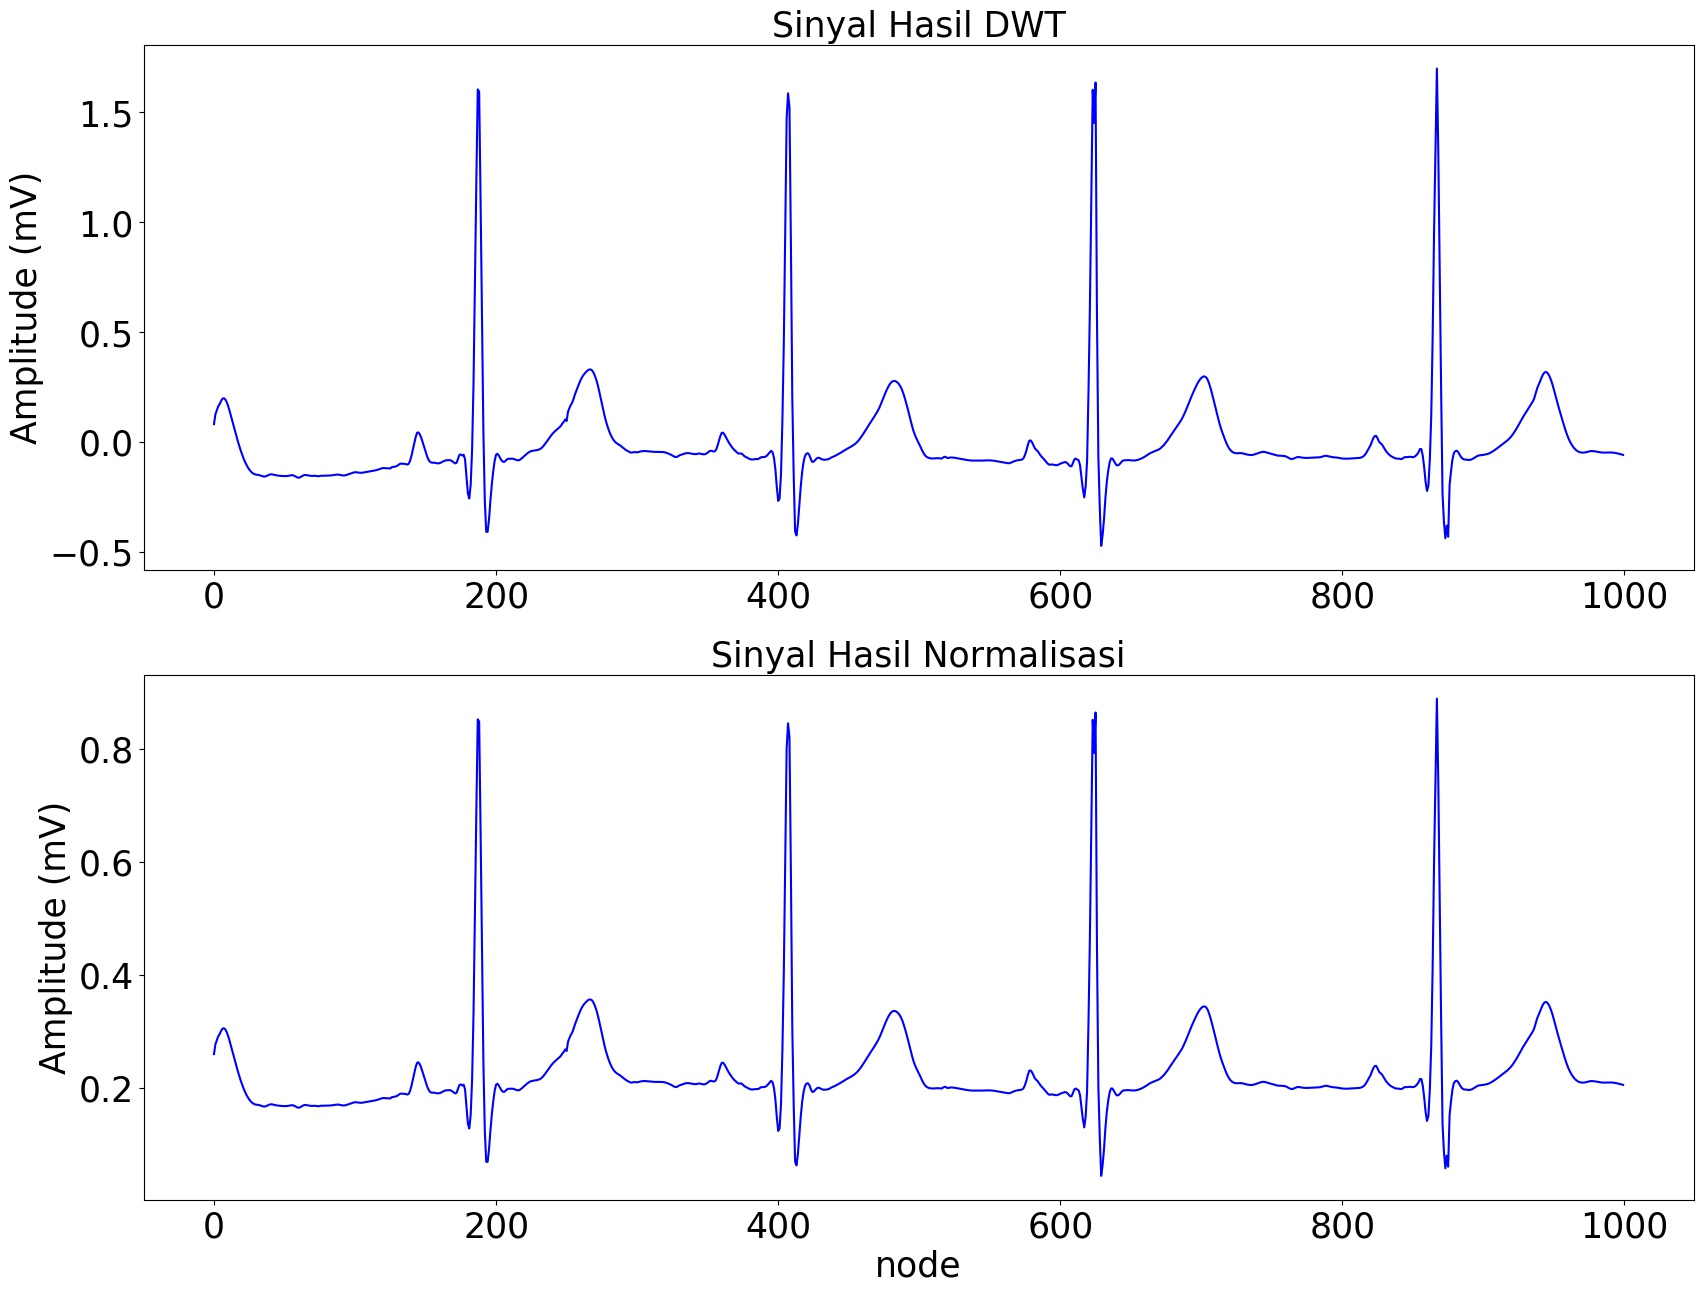

</div>

### 3. Segmentasi
    
    1. By Beat
        Salah satu teknik untuk memotong Beat adalah dengan melihat dari R puncak dan dari titik R puncak akan memotong 0.25 ke kiri sebagai gelombang P dan 0.35 detik ke kanan untuk gelombang T. 
        
Referensi : `Combining Low-dimensional Wavelet Features and Support Vector Machine for Arrhythmia Beat Classification`
   
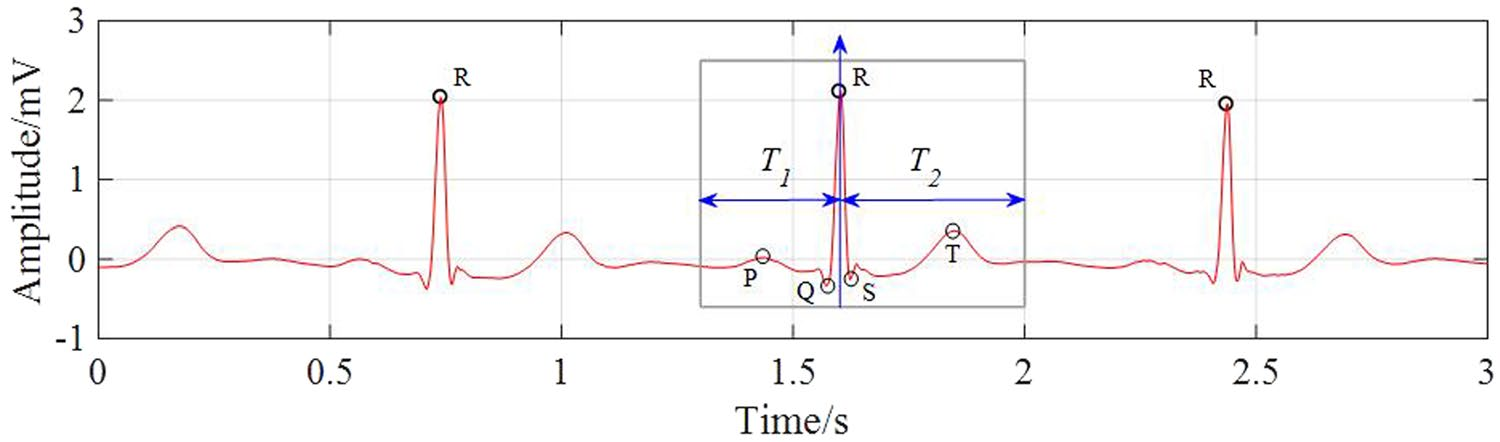
    
    2. By Ritme
        Teknik untuk memotong by ritme dilakukan per waktu ( detik ) atau nodes.

# Contoh Kasus 
## Proses Sinyal EKG dengan Ritme EKG Normal dan AF

In [2]:
path_normal = "data/sel16265.dat"
path_af ="data/04015.dat"

### Informasi Umum Sinyal 

.dat = file berisi sinyal

.hea = header, berisi informasi mengenai sinyal

.atr = atribut, berisi informasi atribut sinyal dan biasanya terdapat informasi label atau anotasi.

Informasi yang biasanya dipakai : 
    
    1. fs = Frekuensi Sampling
    2. p_signal = nilai amplitude sinyal
    3. sig_name = jenis lead sinyal pada p_signal. 
    4. symbol / aux_note = berisi informasi label pada sinyal. Dalam Dataset normal, N = Anotasi R peak, 
    
    Untuk AF, (AFIB -> (N adalah ritme penyakit AF
    5. sample = indeks atau posisi titik dari label symbol atau aux_note.



### 1. Load Data Sinyal

In [3]:
# Normal
nama_file = path_normal.split('.')[0]

record = wfdb.rdrecord(nama_file)
annot = wfdb.rdann(nama_file, extension='atr')

record_dict = record.__dict__
annot_dict = annot.__dict__
sinyal_normal = record_dict['p_signal'][:,0]

print("Informasi pada Record Sinyal \n")
for item in record_dict.items():
    print(item)
    
print("\n Informasi pada atribut Sinyal \n")
for item in annot_dict.items():
    print(item)
    
# af
nama_file = path_af.split('.')[0]
record = wfdb.rdrecord(nama_file)
annot = wfdb.rdann(nama_file, extension='atr')
record_dict = record.__dict__
annot_dict = annot.__dict__
sinyal_af = record_dict['p_signal'][:,0]

Informasi pada Record Sinyal 

('record_name', 'sel16265')
('n_sig', 2)
('fs', 250)
('counter_freq', 128.0)
('base_counter', None)
('sig_len', 224999)
('base_time', None)
('base_date', None)
('comments', ['Produced by xform from record mqt2, beginning at 10:37:30.000'])
('sig_name', ['ECG1', 'ECG2'])
('p_signal', array([[-0.265, -0.055],
       [-0.32 , -0.06 ],
       [-0.335, -0.065],
       ...,
       [-0.145, -0.04 ],
       [-0.145, -0.045],
       [-0.145, -0.05 ]]))
('d_signal', None)
('e_p_signal', None)
('e_d_signal', None)
('file_name', ['sel16265.dat', 'sel16265.dat'])
('fmt', ['212', '212'])
('samps_per_frame', [1, 1])
('skew', [None, None])
('byte_offset', [None, None])
('adc_gain', [200.0, 200.0])
('baseline', [0, 0])
('units', ['mV', 'mV'])
('adc_res', [12, 12])
('adc_zero', [0, 0])
('init_value', [-53, -11])
('checksum', [29461, -27168])
('block_size', [0, 0])

 Informasi pada atribut Sinyal 

('record_name', 'sel16265')
('extension', 'atr')
('sample', array([   216,  

Text(0, 0.5, 'Amplitude (mV)')

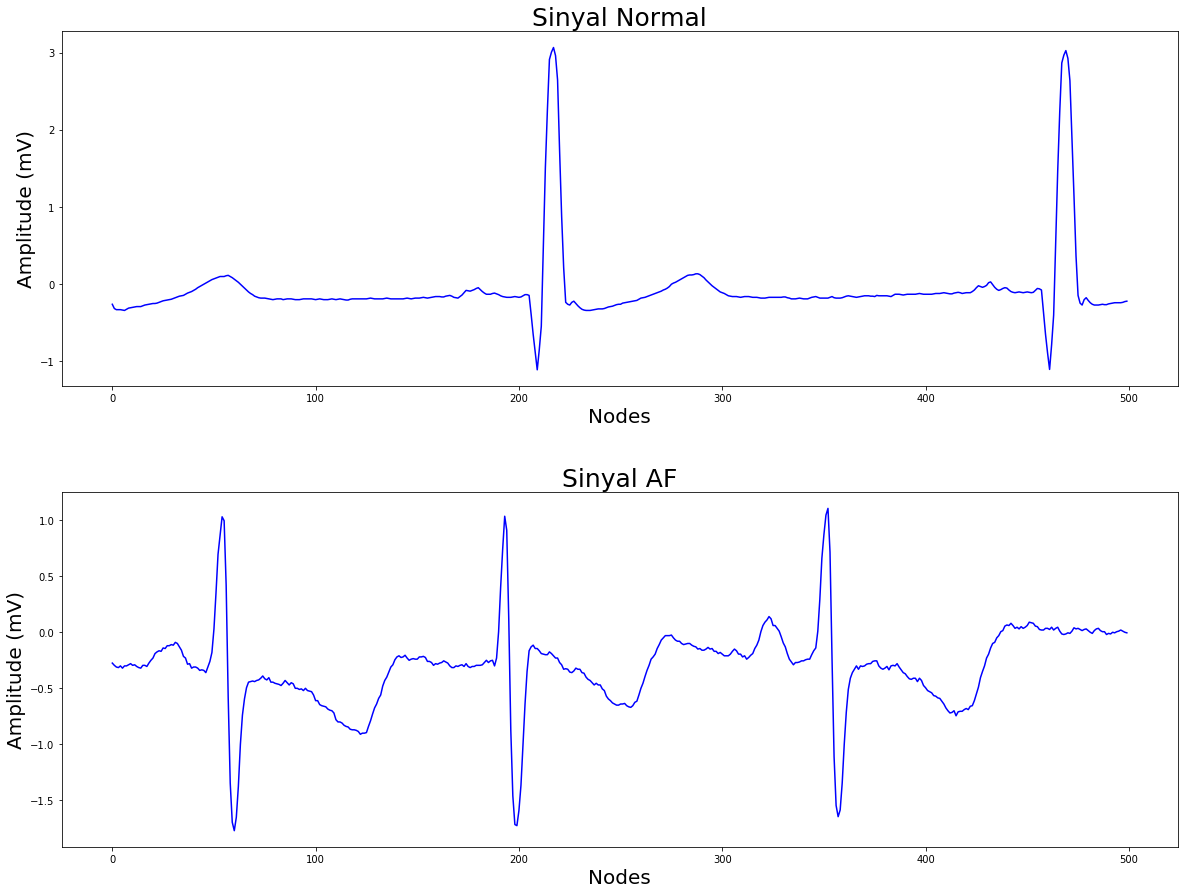

In [4]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(20, 15))
ax1.set_title('Sinyal Normal', size=25)
ax1.plot(range(500),sinyal_normal[:500], color = 'blue')
ax1.set_xlabel('Nodes', size=20)
ax1.set_ylabel('Amplitude (mV)', size=20)
fig.subplots_adjust(hspace=.3)
# DWT
ax2.set_title('Sinyal AF', size=25)
ax2.plot(range(500),sinyal_af[:500], color = 'blue')
ax2.set_xlabel('Nodes', size=20)
ax2.set_ylabel('Amplitude (mV)', size=20)


## Pengurangan Derau /Noise
  
    Sinyal EKG yang belum diproses akan memiliki gangguan noise yang dapat mengaburkan informasi sinyal. 
    
    Oleh karena itu,sinyal EKG perlu diproses sebelum dimasukkan ke dalam classifier.

## 2. Contoh Hasil Pengurangan Noise dengan Menggunakan Discrete Wavelet Transform

Referensi : `Discrete-wavelet-transform-based noise removal and feature extraction for
ECG signals`

Text(0, 0.5, 'Amplitude (mV)')

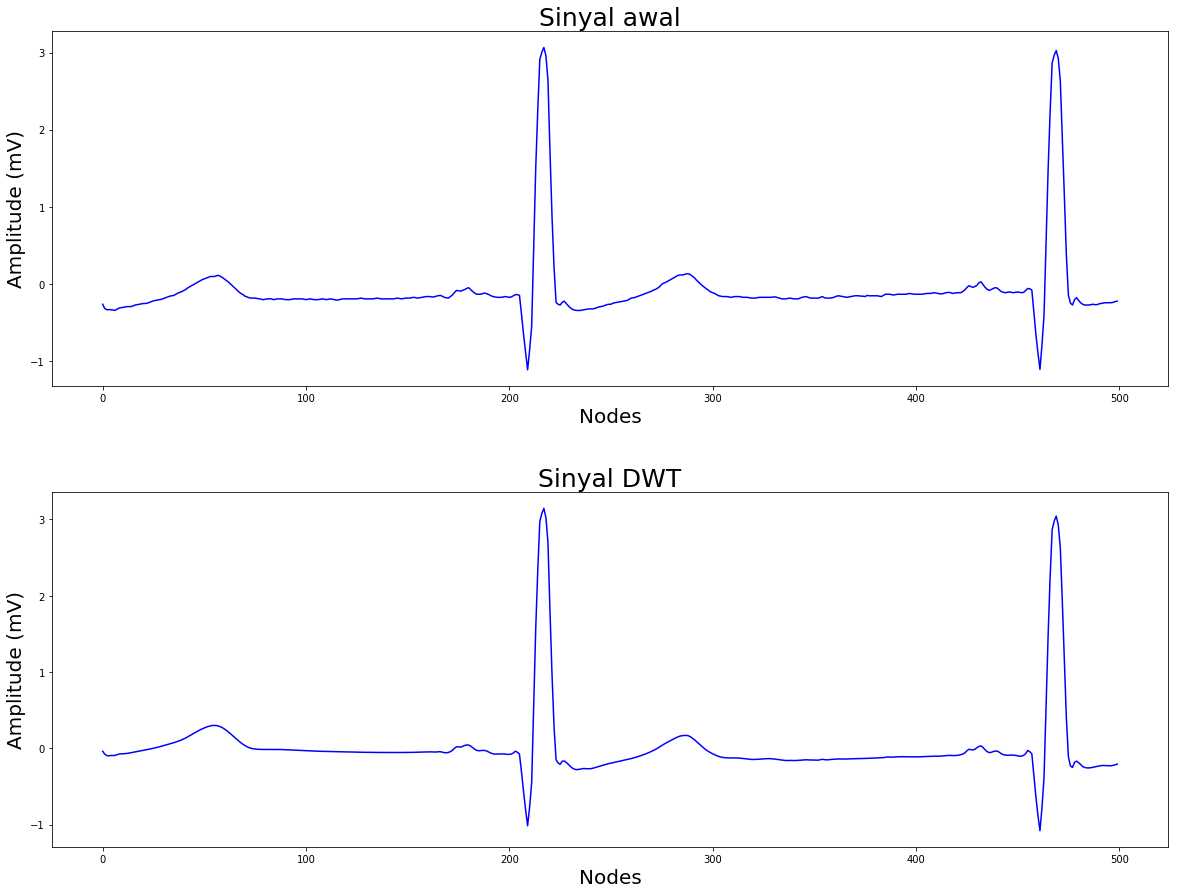

In [5]:
dwt_sinyal = wavelet(sinyal_normal,8,"bior6.8")
normalized_sinyal = wfdb.processing.normalize_bound(dwt_sinyal,lb=0,ub=1)


fig, (ax1,ax2) = plt.subplots(2, figsize=(20, 15))
ax1.set_title('Sinyal awal', size=25)
ax1.plot(range(500),sinyal_normal[:500], color = 'blue')
ax1.set_xlabel('Nodes', size=20)
ax1.set_ylabel('Amplitude (mV)', size=20)
fig.subplots_adjust(hspace=.3)
# DWT
ax2.set_title('Sinyal DWT', size=25)
ax2.plot(range(500),dwt_sinyal[:500], color = 'blue')
ax2.set_xlabel('Nodes', size=20)
ax2.set_ylabel('Amplitude (mV)', size=20)


## Filter Label 

**CONTOH** 

Data ini menggunakan Data MIT-BIH NOrmal sinus dan Atrial Fibrillation. Untuk normal sinus sudah pasti `ritme normal` dan untuk data AF terdapat `4 Label.`

Sebagai contoh AF digunakan 1 label yaitu AF dengan label di data adalah '(AFIB'. Sinyal yang diambil adalah sinyal dari titik `(AFIB` sampai titik `(X` , X adalah label selain (AFIB. 

    1. AF = (AFIB -> Anything
Referensi : `https://physionet.org/content/afdb/1.0.0/`

Dengan contoh gambar dibawah, Akan ada 5 sinyal AF yang di ambil dari record tersebut.

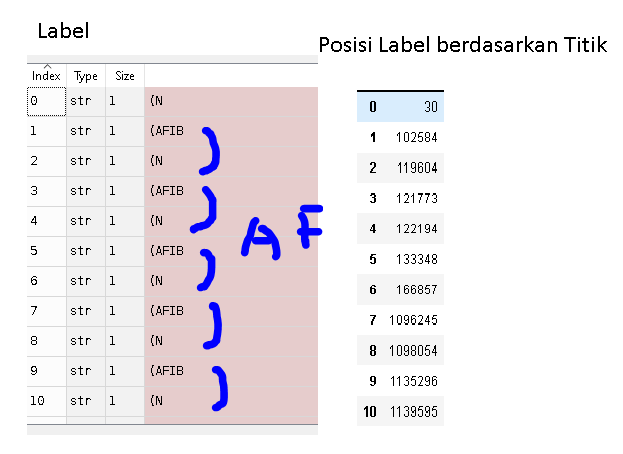

## 3. Pengambilan Sinyal AF

In [6]:
sinyal =[]
label =[]
aux_note = annot_dict['aux_note']
sample = annot_dict['sample']
idx_aux = 0
for aux in aux_note:
    # Jika Sudah sampai akhir, berhenti
    if idx_aux == len(aux_note)-1:
        continue

    # Data AF
    if aux == "(AFIB":
        # Ambil sinyal AF mulai dari titik (AFIB.
        signal_selected = sinyal_af[sample[idx_aux]:sample[idx_aux + 1]]
        sinyal.append(signal_selected)
        label.extend([1])
    idx_aux = idx_aux+1

print('Panjang sinyal awal : ',len(sinyal_af))
for i in sinyal:
    print('\n Panjang sinyal yang diambil : ',len(i))

Panjang sinyal awal :  9205760

 Panjang sinyal yang diambil :  17020

 Panjang sinyal yang diambil :  421

 Panjang sinyal yang diambil :  33509

 Panjang sinyal yang diambil :  1809

 Panjang sinyal yang diambil :  4299

 Panjang sinyal yang diambil :  1112

 Panjang sinyal yang diambil :  1139


## 4. Segmentasi Sinyal 

In [7]:
all_sinyal = []
all_label = []
idx = 0
for ritme in sinyal: 
    print("Segmentasi Sinyal ke ",idx+1)
    panjang_ritme = len(ritme)
    jumlah_ritme = int(panjang_ritme / 500)
    awal = 0
    akhir = 500
    for i in range(jumlah_ritme):
        all_sinyal.append(ritme[awal:akhir])
        all_label.extend([label[idx]])
        awal = akhir
        akhir = akhir + 500 
    print("Panjang sinyal {} di bagi menjadi {} sinyal dengan jumlah 500 Nodes\n".format(len(ritme),i+1))
    i = 0
    idx = idx+1

Segmentasi Sinyal ke  1
Panjang sinyal 17020 di bagi menjadi 34 sinyal dengan jumlah 500 Nodes

Segmentasi Sinyal ke  2
Panjang sinyal 421 di bagi menjadi 1 sinyal dengan jumlah 500 Nodes

Segmentasi Sinyal ke  3
Panjang sinyal 33509 di bagi menjadi 67 sinyal dengan jumlah 500 Nodes

Segmentasi Sinyal ke  4
Panjang sinyal 1809 di bagi menjadi 3 sinyal dengan jumlah 500 Nodes

Segmentasi Sinyal ke  5
Panjang sinyal 4299 di bagi menjadi 8 sinyal dengan jumlah 500 Nodes

Segmentasi Sinyal ke  6
Panjang sinyal 1112 di bagi menjadi 2 sinyal dengan jumlah 500 Nodes

Segmentasi Sinyal ke  7
Panjang sinyal 1139 di bagi menjadi 2 sinyal dengan jumlah 500 Nodes



## Plot sebelum dan sesudah segmentasi

Text(0, 0.5, 'Amplitude (mV)')

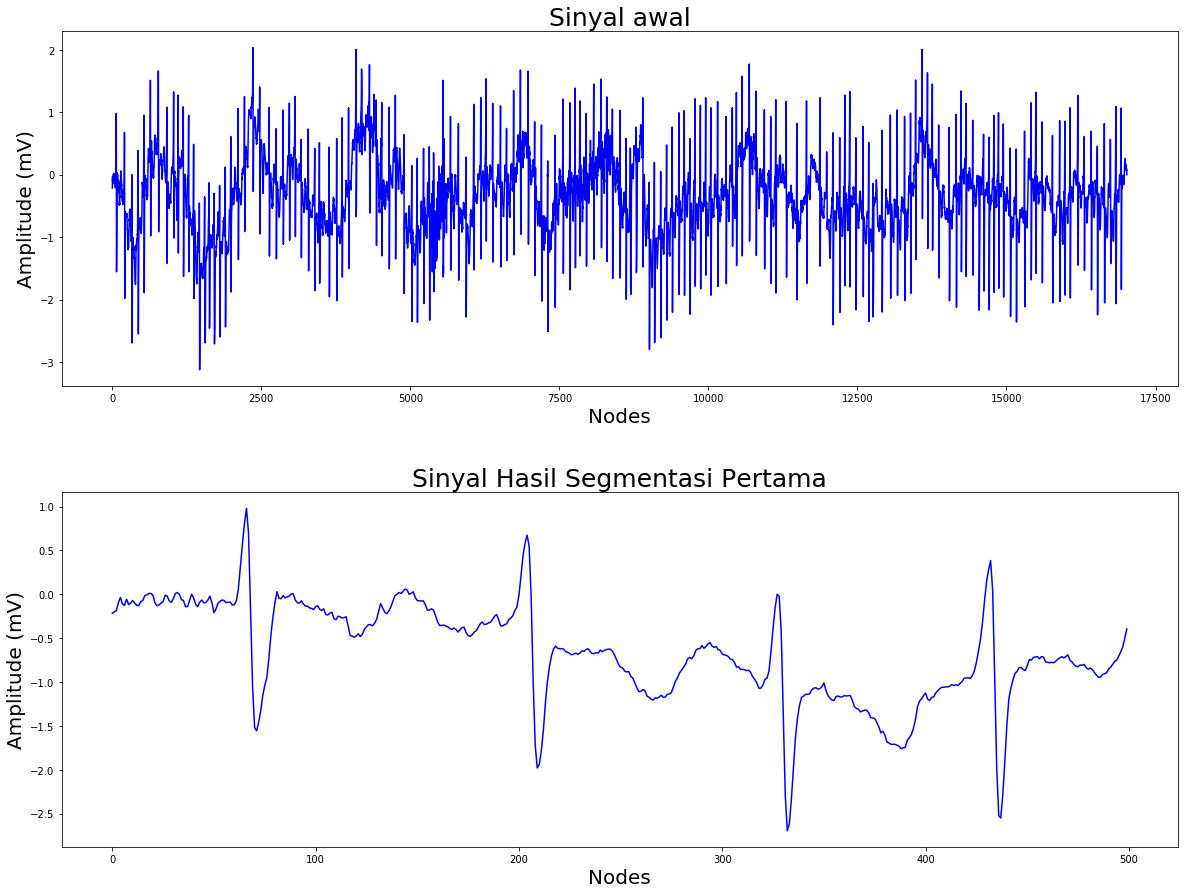

In [8]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(20, 15))
ax1.set_title('Sinyal awal', size=25)
x = range(len(sinyal[0]))
ax1.plot(x,sinyal[0], color = 'blue')
ax1.set_xlabel('Nodes', size=20)
ax1.set_ylabel('Amplitude (mV)', size=20)
fig.subplots_adjust(hspace=.3)
# DWT
ax2.set_title('Sinyal Hasil Segmentasi Pertama', size=25)
ax2.plot(range(500),all_sinyal[0], color = 'blue')
ax2.set_xlabel('Nodes', size=20)
ax2.set_ylabel('Amplitude (mV)', size=20)


### 5. Bagi data latih dan data uji

In [9]:
from sklearn.model_selection import train_test_split

all_sinyal = np.array(all_sinyal)
all_label = np.array(all_label)

#train_data,test_data,train_label, test_label = train_test_split(all_sinyal,all_label,test_size=0.1,random_state=42)

### Simpan file sinyal dan label yang sudah diproses ke file

In [ ]:
#with open('sinyal', 'wb') as fsave:
#    pickle.dump(all_sinyal, fsave)

#with open('label', 'wb') as fsave:
#    pickle.dump(all_label, fsave)

# Full Code 

In [10]:
# load library
import wfdb
import glob
import numpy as np
from matplotlib import pyplot as plt
from wfdb import processing as prep
import pickle
import pandas
from wavelet import wavelet
from keras.optimizers import Adam,rmsprop
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [11]:
# load path
path_data = glob.glob("data/*.dat")
print (path_data)

['data\\04015.dat', 'data\\08405.dat', 'data\\08434.dat', 'data\\08455.dat', 'data\\sel16265.dat', 'data\\sel16272.dat', 'data\\sel16273.dat', 'data\\sel16420.dat', 'data\\sel16483.dat', 'data\\sel16539.dat', 'data\\sel16773.dat', 'data\\sel16786.dat', 'data\\sel16795.dat', 'data\\sel17453.dat']


In [12]:
all_sinyal = []
all_label = []
sinyal = []
label =[]
for i in range(len(path_data)):
    print("Proses Record ke ",i+1)
    # Load sinyal
    nama_file = path_data[i].split('.')[0]
    record = wfdb.rdrecord(nama_file)
    annot = wfdb.rdann(nama_file, extension='atr')
    
    record_dict = record.__dict__
    annot_dict = annot.__dict__
    
    sinyal_asli = record_dict['p_signal'][:,0]
    dwt_sinyal = wavelet(sinyal_asli,8,"bior6.8")
    normalized_sinyal = wfdb.processing.normalize_bound(dwt_sinyal,lb=0,ub=1)
    
    aux_note = annot_dict['aux_note']
    aux_note = np.array(aux_note)
    sample = annot_dict['sample']
    sample = np.array(sample)
    
    # PRoses ambil data AF dan NOrmal
    idx_aux = 0
    for aux in aux_note:
        # Jika Sudah sampai akhir, berhenti
        if idx_aux == len(aux_note)-1:
            continue
            
        # Data AF
        if aux == "(AFIB":
            # Ambil sinyal AF mulai dari titik (AFIB.
            signal_selected = normalized_sinyal[sample[idx_aux]:sample[idx_aux + 1]]
            sinyal.append(signal_selected)
            label.extend([1])
            
        # Data Normal , ambil semua sinyal karna pasti ritme normal
        elif aux == '':
            signal_selected = normalized_sinyal[:]
            sinyal.append(signal_selected)
            label.extend([0])
            break
        idx_aux = idx_aux+1
    
# Segmentasi Ritme Sinyal per 2 detik atau 500 nodes ( fs= 250)
idx = 0
for ritme in sinyal: 
    panjang_ritme = len(ritme)
    jumlah_ritme = int(panjang_ritme / 500)
    awal = 0
    akhir = 500
    for i in range(jumlah_ritme):
        all_sinyal.append(ritme[awal:akhir])
        all_label.extend([label[idx]])
        awal = akhir
        akhir = akhir + 500    
    idx = idx+1
    
# Train test Split
all_sinyal = np.array(all_sinyal)
all_label = np.array(all_label)

train_data,test_data,train_label, test_label = train_test_split(all_sinyal,all_label,test_size=0.1,random_state=42)

Proses Record ke  1
Proses Record ke  2
Proses Record ke  3
Proses Record ke  4
Proses Record ke  5
Proses Record ke  6
Proses Record ke  7
Proses Record ke  8
Proses Record ke  9
Proses Record ke  10
Proses Record ke  11
Proses Record ke  12
Proses Record ke  13
Proses Record ke  14


In [13]:
# Classifier ANN
model = Sequential()
model.add(Dense(units= 500, input_dim =train_data.shape[1] , activation=relu))
model.add(Dense(units= 500, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
acc_training = model.fit(train_data, train_label, validation_data=(test_data, test_label), batch_size=16, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 4823 samples, validate on 536 samples
Epoch 1/10
4823/4823 [==============================] - 4s 739us/step - loss: 0.3677 - accuracy: 0.8806 - val_loss: 0.2286 - val_accuracy: 0.9142
Epoch 2/10
4823/4823 [==============================] - 3s 627us/step - loss: 0.1073 - accuracy: 0.9699 - val_loss: 0.1234 - val_accuracy: 0.9198
Epoch 3/10
4823/4823 [==============================] - 3s 637us/step - loss: 0.0504 - accuracy: 0.9886 - val_loss: 0.0695 - val_accuracy: 0.9720
Epoch 4/10
4823/4823 [==============================] - 3s 630us/step - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 5/10
4823/4823 [==============================] - 3s 616us/step - loss: 0.0422 - accuracy: 0.9903 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 6/10
4823/4823 [=========================

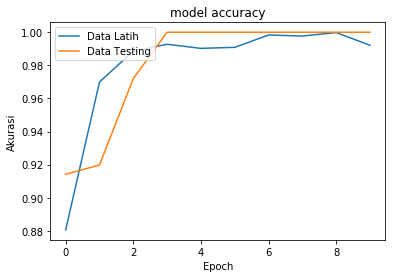

In [14]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()